In [176]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_pyber_df = pd.merge(city_data, ride_data, how="outer", on="city")

# Display the data table for preview with the columns rearranged
combined_pyber_df = combined_pyber_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

# Various Calculations

In [177]:
# Group by City Name
Cities = combined_pyber_df.groupby('city')
#Cities.head()

In [178]:
# Total Number of Cities = 120
Total_Cities = len(combined_pyber_df["city"].unique())
Total_Cities

120

In [179]:
# Total Number of Rides(Records) Overall = 2375 - needed in pie calculations
Total_Rides = len(combined_pyber_df["ride_id"].unique())
Total_Rides

2375

In [180]:
# Total Number of Drivers Overall = 68709 w/duplicates, 2973 w/o duplicates using city_data file - needed in pie calculations
Total_Drivers = city_data["driver_count"].sum()
Total_Drivers

2973

In [181]:
# Total Fares in Dollars Overall = $63,538.64 - needed in pie calculations
Total_Fares = combined_pyber_df["fare"].sum()
Total_Fares

63538.64

In [182]:
#Calculate TOTAL Average Fare ($) Overall - not needed in calculations
Tot_AvgFare_City = round(Total_Fares/Total_Cities, 2)
Tot_AvgFare_City

529.49

In [183]:
#Calculate Total Average Fare ($) per Ride Overall - not needed in calculations
Tot_AvgFare_Ride = round(Total_Fares/Total_Rides, 2)
Tot_AvgFare_Ride

26.75

In [184]:
#Calculate Total Average Fare per City Type - not needed in calculations
Tot_AvgFare_CityType = Fares_CityType/Rides_CityType
Tot_AvgFare_CityType

Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

# Obtain the x and y coordinates for each of the three city types

In [185]:
#Calculate the "x" values, x=Number of Rides per City (Rides_City)

#Option 1 = ordered by High to Low Count
#Rides_City = combined_pyber_df["city"].value_counts()
#Rides_City

#Option 2 = ordered by City Name
Rides_City = Cities['ride_id'].count()

#x = Rides_City
#print(x)

In [186]:
#Calculate the "y" values, y=Average Fare per City (AvgFare_City)

#Option #1 using x values
#Fares_City = combined_pyber_df.groupby(['city']).fare.sum() 
#print(Fares_City)
#AvgFare_City = round(Fares_City/x, 2)
#print(AvgFare_City)

#Option #2 wihout x values
#Calculate Average Fare ($) per each City
AvgFare_City = round(Cities.mean()['fare'], 2)

#y = AvgFare_City
#print(y)

In [187]:
#Calculate the values for Bubbles, Bubble data "s" = Number of Drivers by City Type

#First, Calculate the Number of Drivers per City

#Option1 = ordered by High to Low Count using city_data w/o duplicates
#Drivers_City = city_data.groupby(['city']).driver_count.sum()
#print(Drivers_City)

#Option #2 
Drivers_City = Cities.mean()['driver_count']
#Drivers_City

In [188]:
#Second, Set index to City Type and Order by Type - using city_data file
CityType = city_data.set_index('city')['type']
#CityType

In [189]:
#Third, Create New df for all values (x=Rides_City, y=AvgFare_City, Drivers_City, CityType)
New_df = pd.DataFrame({"x":Rides_City, "y":AvgFare_City, "drivers":Drivers_City, "type":CityType})
New_df.sort_values('drivers', ascending = False)
New_df.head()

,x,y,drivers,type
Amandaburgh,18,24.64,12.0,Urban
Barajasview,22,25.33,26.0,Urban
Barronchester,16,36.42,11.0,Suburban
Bethanyland,18,32.96,22.0,Suburban
Bradshawfurt,10,40.06,7.0,Rural


In [190]:
#Fourth, Create Separate df for each City Type by Type
rural = New_df[New_df['type'] == 'Rural']
suburban = New_df[New_df['type'] == 'Suburban']
urban = New_df[New_df['type'] == 'Urban']
#Add Colors (Put colors in a Dictionary)
Colors={'Urban':["lightcoral"], 'Suburban':["skyblue"], 'Rural':["gold"]}

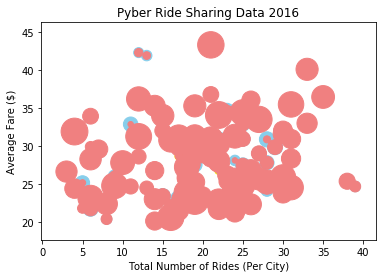

In [191]:
# Build the scatter plots for each city types, Set "s" values
plt.scatter(x, y, s=rural['drivers']*10, color=Colors['Rural'])
plt.scatter(x, y, s=suburban['drivers']*10, color=Colors['Suburban'])
plt.scatter(x, y, s=urban['drivers']*10, color=Colors['Urban'])

# Add Labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data 2016')

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

#Show Plot
plt.show()

## Total Fares by City Type

In [192]:
#Calculate Total Fares per City Type
#Total_Fares = combined_pyber_df["fare"].sum() = 63538.64
Fares_CityType = combined_pyber_df.groupby(['type']).fare.sum()
Fares_CityType
Fare_Percents = round((Fares_CityType/Total_Fares)*100, 1)
Fare_Percents

type
Rural        6.8
Suburban    30.5
Urban       62.7
Name: fare, dtype: float64

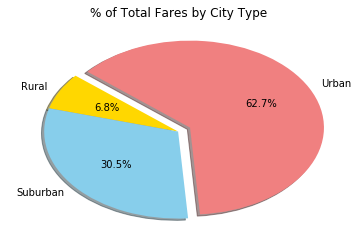

In [193]:
# Build Pie Chart
#Fares_Percents.plot{kind="pie"}
Labels=["Rural", "Suburban", "Urban"]
Explode=[0, 0, 0.10]
Colors=["gold", "skyblue", "lightcoral"]
plt.pie(Fare_Percents, labels=Labels, autopct="%.1f%%", shadow=True, explode=Explode, colors=Colors, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure

## Total Rides by City Type

In [194]:
# Calculate Ride Percents
#Calculate Total Number of Rides per City Type
Rides_CityType = combined_pyber_df["type"].value_counts()
Rides_CityType
Ride_Percents = round((Rides_CityType/Total_Rides)*100, 1)
Ride_Percents

Urban       68.4
Suburban    26.3
Rural        5.3
Name: type, dtype: float64

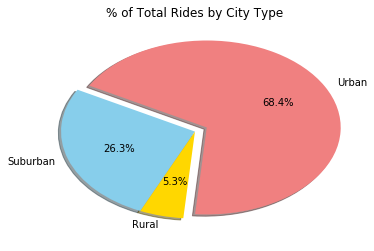

In [195]:
# Build Pie Chart
#Ride_Percents.plot{kind="pie"}
Labels=["Urban", "Suburban", "Rural"]
Explode=[0.10, 0, 0]
Colors=["lightcoral", "skyblue", "gold"]
plt.pie(Ride_Percents, labels=Labels, autopct="%.1f%%", shadow=True, explode=Explode, colors=Colors, startangle=-95)
plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure

## Total Drivers by City Type

In [196]:
# Calculate Driver Percents

#Calculate Total Number of Drivers per City Type = 2973
Drivers_CityType = city_data.groupby(['type']).driver_count.sum()
Drivers_CityType
Driver_Percents = round((Drivers_CityType/Total_Drivers)*100, 1)
Driver_Percents

type
Rural        2.6
Suburban    16.5
Urban       80.9
Name: driver_count, dtype: float64

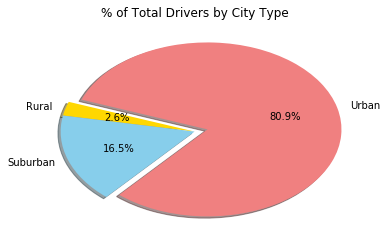

In [197]:
# Build Pie Chart
#Driver_Percents.plot{kind="pie"}
Labels=["Rural", "Suburban", "Urban"]
Explode=[0, 0, 0.10]
Colors=["gold", "skyblue", "lightcoral"]
plt.pie(Driver_Percents, labels=Labels, autopct="%.1f%%", shadow=True, explode=Explode, colors=Colors, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure